# **Customer Churn Prediction**

## **What is Customer Churn?**
Customer churn refers to the loss of existing customers over a specific period. It is a key metric for assessing customer satisfaction and loyalty, providing insights into potential risks to revenue and overall business performance. Churn can be measured through actual usage patterns or by tracking subscription renewals. Analyses are typically conducted on a monthly, quarterly, or annual basis to monitor trends and guide customer retention strategies.

## **Dataset**
This project uses a dataset from [Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn) contributed by BlastChar.

## **Import Required Packages for Data Visualization and Classification Problem**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score, recall_score

## **Load Data**



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

The dataset contains 7043 rows and 20 columns.

In [5]:
for col in df.columns:
    print(col, ":", df[col].unique())

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

The code above checks the unique values in each column of the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Based on df.info(), more detailed information about the twenty columns in this dataset can be obtained. Each column is explained as follows.
*   **Churn** - This column indicates whether the customer has discontinued the service within the last month. It is a categorical variable with two possible values, Yes or No.
*   **Services that each customer has signed up for** - Whether the customer has **phone** (Yes/No), **multiple lines** (Yes/No/No Phone Service), **internet** (DSL/Fiber Optic/No), **online security** (Yes/No/No Internet Service), **online backup** (Yes/No/No Internet Service), **device protection** (Yes/No/No Internet Service), **tech support** (Yes/No/No Internet Service), **streaming TV** (Yes/No/No Internet Service), and **movies** (Yes/No/No Internet Service).
*   **Customer account information** – how long they’ve been a customer (**Tenure**), contract (**Month-to-Month/One yearTwo years**), payment method (**Electronic Check/Mailed Check/Bank transfer (Automatic)/Credit card (Automatic)**), paperless billing (**Yes/No**), monthly charges, and total charges.
*   **Demographic info about customers** – gender, age range, and if they have partners and dependents.




In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## **Descriptive Statistics**

### **SeniorCitizen**  
- This is a categorical variable, represented by binary values where **0** indicates non-senior and **1** indicates senior.  
- The mean value of **0.16** suggests that only about **16% of customers are senior citizens**.  

### **Tenure**  
- Customer tenure ranges from **0 months** (new customers) to a maximum of **72 months**.  
- The average tenure is approximately **32 months**.  
- The median tenure is **29 months**, showing that half of the customers have been with the company for less than 29 months.  
- **25%** of customers have a tenure of **9 months or less**, while **75%** have a tenure of **55 months or less**.  
- This indicates that most customers remain subscribed for a few years, but long-term loyalty beyond five years is less common.  

### **MonthlyCharges**  
- Monthly charges range from **USD 18.25** to **USD 118.75**.  
- The average monthly charge is around **USD 64.76**.  
- The median charge is **USD 70.35**, suggesting that half of the customers pay less than this amount.  
- **25%** of customers pay **USD 35.50 or less**, while **75%** of customers pay **USD 89.85 or less**.  
- The standard deviation of **30.09** indicates considerable variation in the monthly charges across customers.  

In [8]:
# For once again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the information above, it can be seen that **TotalCharges** is stored as an `object` data type, whereas it should be represented as a `float`.  

The reason is that **TotalCharges** reflects the total amount charged to a customer during their tenure. Since it is a numerical value that may include decimal points, the appropriate data type is `float`.  

Keeping it as an `object` (string) would prevent performing numerical operations such as calculating averages, aggregations, or applying statistical and machine learning models. Converting it to `float` ensures that the column can be properly analyzed and used in further processing.  

In [9]:
# Convert TotalCharges to float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [10]:
# Checking PaymentMethod
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [11]:
# Delete "automatic" from PaymentMethod
df["PaymentMethod"] = df["PaymentMethod"].str.replace(" (automatic)", "", regex=False)

## **Checking Missing Values**

In [12]:
features_na = [feature for feature in df.columns if df[feature].isnull().sum() > 1]

for feature in features_na:
    print(f"{feature}, {round(df[feature].isnull().mean(), 4)} % Missing values")

TotalCharges, 0.0016 % Missing values


In [13]:
df[df[features_na[0]].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer,52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card,56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since all of the tenure values are zero, the corresponding records with missing values will be removed from the dataset.

In [14]:
df.dropna(inplace=True)

In [15]:
# Checking duplication
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


## **Target Variable Visualization**

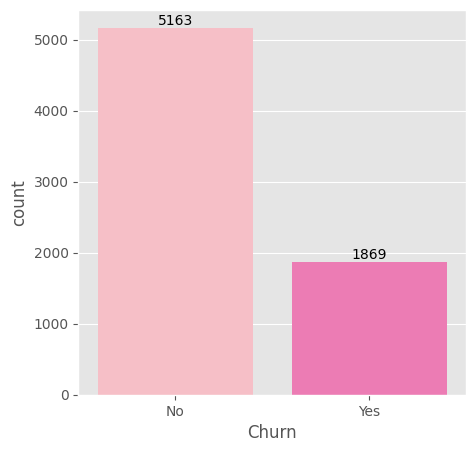

In [16]:
plt.style.use("ggplot")
plt.figure(figsize=(5,5))
ax = sns.countplot(x="Churn", data=df, hue="Churn",
                   palette=["#ffb6c1", "#ff69b4"], legend=False)

for container in ax.containers:
    ax.bar_label(container)

plt.show()

In the target variable Churn, there are 5,163 customers who did not churn (No) and 1,869 customers who churned (Yes). This distribution shows an imbalance, as the majority of the data (about 73%) belongs to the No class, while only 27% belongs to the Yes class. Such a condition is referred to as an imbalanced dataset, which may cause the model to favor the majority class and overlook the minority class.

Although techniques such as oversampling or undersampling can be applied to balance the class distribution, in this analysis the dataset will remain unchanged. Instead, the model’s performance will be evaluated using various metrics such as Precision, Recall, F1-score, and ROC-AUC, rather than accuracy alone, to ensure a more reliable evaluation.

## **Services Analysis**

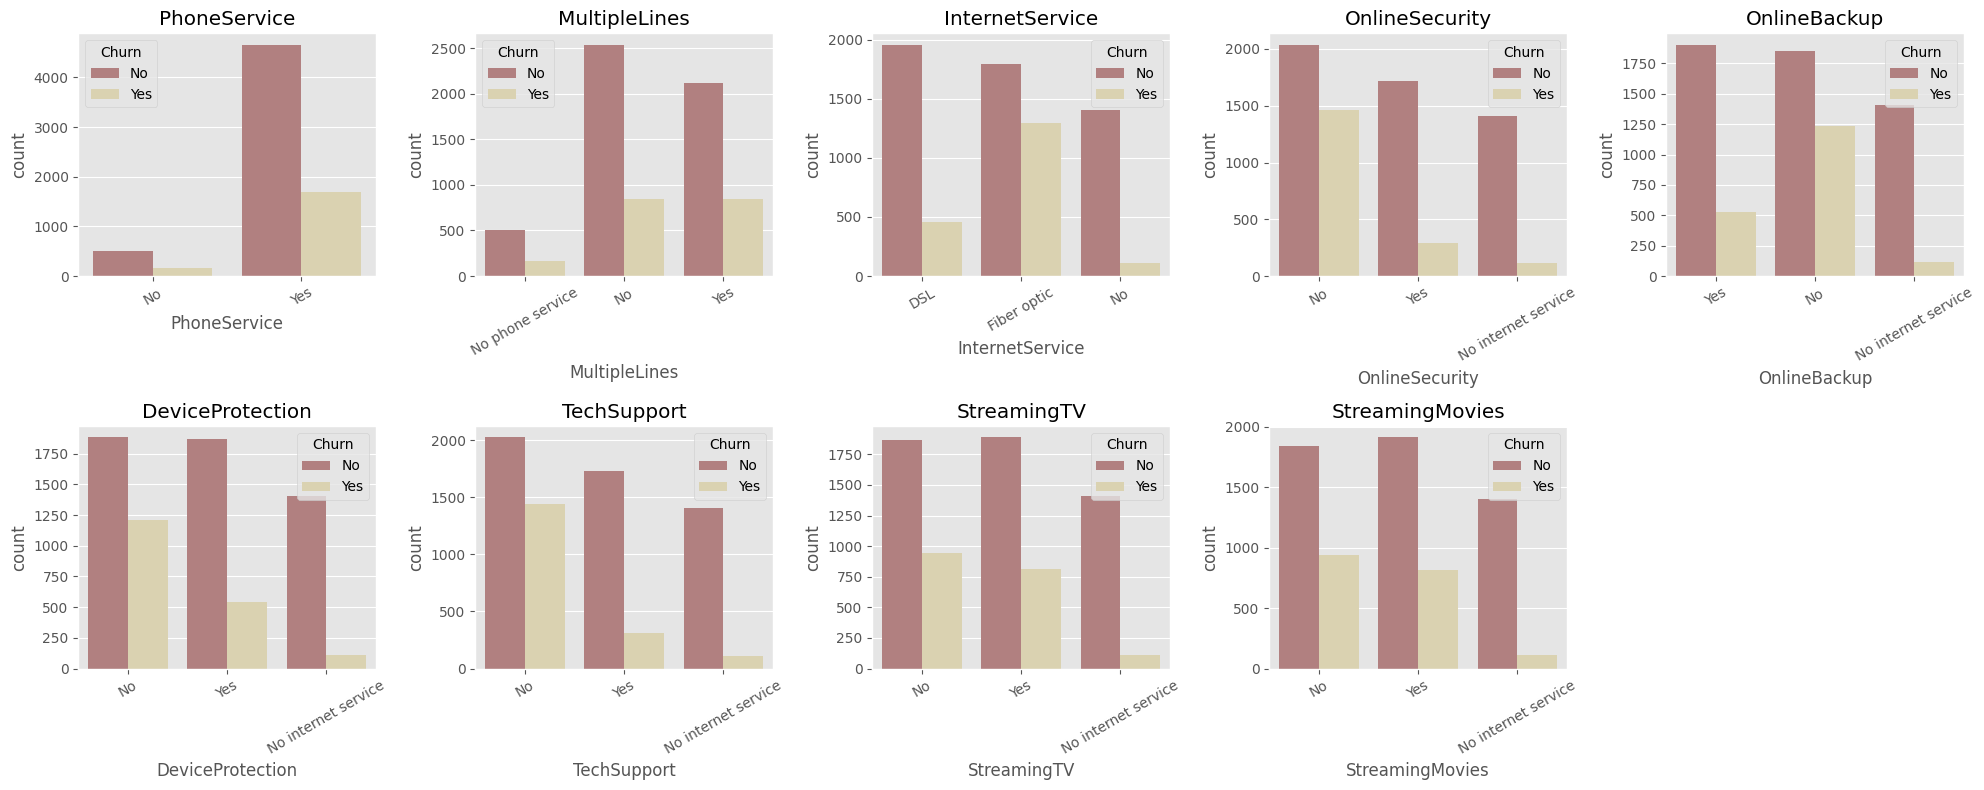

In [17]:
def plot_categorical_to_target(df, categorical_values, target):
    number_of_columns = 5
    number_of_rows = math.ceil(len(categorical_values)/number_of_columns)
    fig = plt.figure(figsize=(20, 8))

    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        sns.countplot(x=column, data=df, hue=target, palette="pink", ax=ax)
        ax.set_title(column)
        ax.tick_params(axis='x', rotation=30)

    plt.tight_layout()
    plt.show()

customer_services = [
    "PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"
]

plot_categorical_to_target(df, customer_services, "Churn")

From the visualizations above, several patterns can be observed in relation to customer churn. Customers with phone service tend to show a slightly higher churn rate than those without. For multiple lines, subscribers with one or more lines are more likely to churn compared to those who do not use phone service.  
Internet service plays a strong role, as customers using fiber optic have a noticeably higher churn rate compared to DSL users or those without internet.  

Service-related features also reveal clear trends. Customers without online security, online backup, device protection, and tech support demonstrate a greater tendency to leave the company, highlighting the importance of these support services in retaining customers. Meanwhile, entertainment services such as streaming TV and streaming movies are associated with higher churn, suggesting that customers who subscribe to these additional features may also be more price-sensitive or more likely to switch providers.  

Overall, the absence of protective and support services appears to be one of the strongest drivers of churn, while fiber optic internet users and those with entertainment add-ons also contribute significantly to customer attrition.

## **Customer Account Analysis (Categorical)**

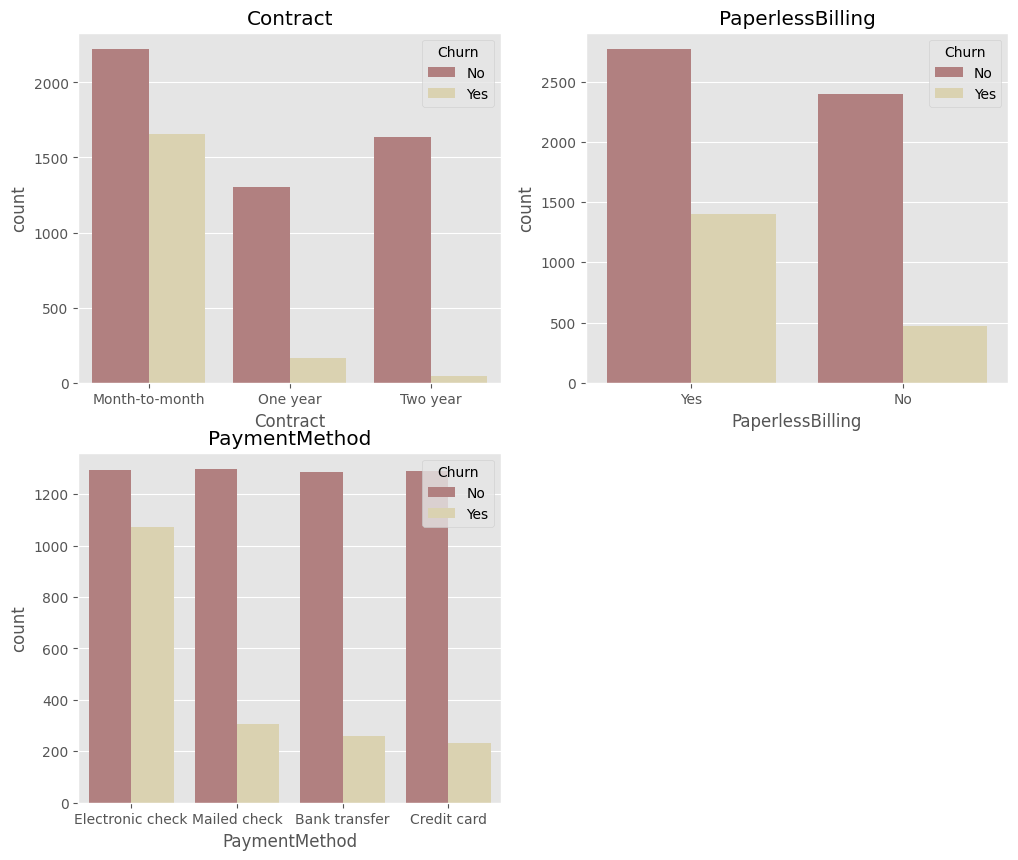

In [18]:

def plot_categorical_to_target(df, categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values) / 2)

    fig = plt.figure(figsize=(12, 5 * number_of_rows))

    for index, column in enumerate(categorical_values, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        ax = sns.countplot(x=column, data=df, hue=target, palette="pink")
        ax.set_title(column)
    return plt.show()

customer_account_cat = ["Contract", "PaperlessBilling", "PaymentMethod"]

plot_categorical_to_target(df, customer_account_cat, "Churn")

The plots above reveal several patterns regarding customer churn:  

- Customers with **month-to-month contracts** are more prone to churn compared to those with one-year or two-year contracts, suggesting that shorter commitments may increase the likelihood of leaving.  
- **Paperless billing users** exhibit a noticeably higher churn rate than those who opt for mailed billing, indicating that billing preferences may be linked to customer retention.  
- In terms of payment method, customers paying via **electronic check** show the highest churn levels, while those using bank transfers, credit cards, or mailed checks tend to remain longer with the company.  

Overall, contract type, billing method, and payment choice appear to have a strong influence on whether a customer decides to stay or churn.  

## **Customer Account Analysis (Numerical)**


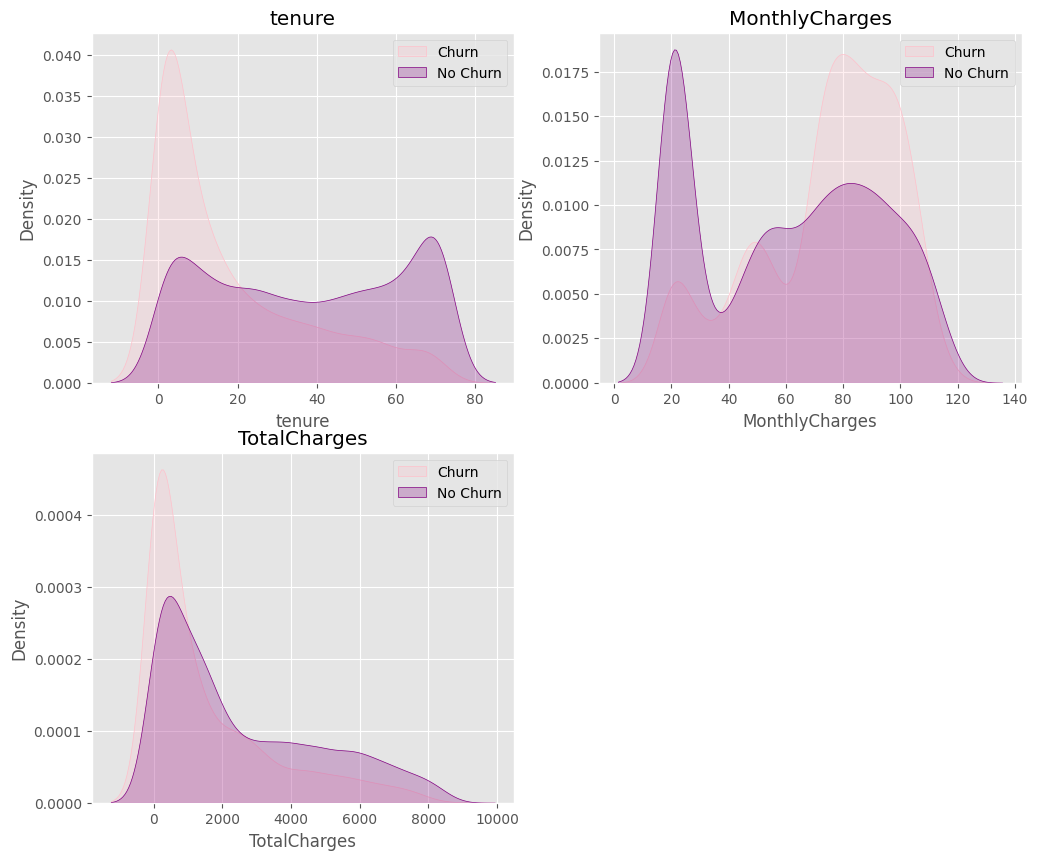

In [19]:
def histogram_plots(df, numerical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(numerical_values)/2)

    fig = plt.figure(figsize=(12,5*number_of_rows))

    for index, column in enumerate(numerical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        sns.kdeplot(df[column][df[target]=="Yes"], fill=True, color="pink", ax=ax)
        sns.kdeplot(df[column][df[target]=="No"], fill=True, color="purple", ax=ax)
        ax.set_title(column)
        ax.legend(["Churn","No Churn"], loc='upper right')

    plt.savefig("numerical_variables.png", dpi=300)
    return plt.show()

customer_account_num = ["tenure", "MonthlyCharges", "TotalCharges"]

histogram_plots(df, customer_account_num, "Churn")

**Tenure**  
- Customers with shorter tenure (closer to zero months) show a much higher churn rate.  
- As tenure increases, the probability of churn decreases significantly.  
- This indicates that long-term customers are more loyal and less likely to leave.  

**MonthlyCharges**  
- Customers with higher monthly charges tend to churn more frequently compared to those with lower charges.  
- The churn density is especially elevated in the mid-to-high range of charges, suggesting that higher pricing may contribute to customer dissatisfaction.  
- Non-churned customers are more evenly spread across lower and moderate charge levels.  

**TotalCharges**  
- Churned customers are concentrated in the lower range of total charges, which aligns with shorter tenure (they have not been with the company long enough to accumulate high total charges).  
- Customers with higher total charges are more likely to stay, reinforcing the trend that long-term and high-value customers demonstrate greater loyalty.  

Overall, churn is strongly associated with **shorter tenure, higher monthly charges, and lower accumulated total charges**. These patterns suggest that early-stage customers with expensive plans are at the highest risk of leaving.  

## **Customer Demographic**

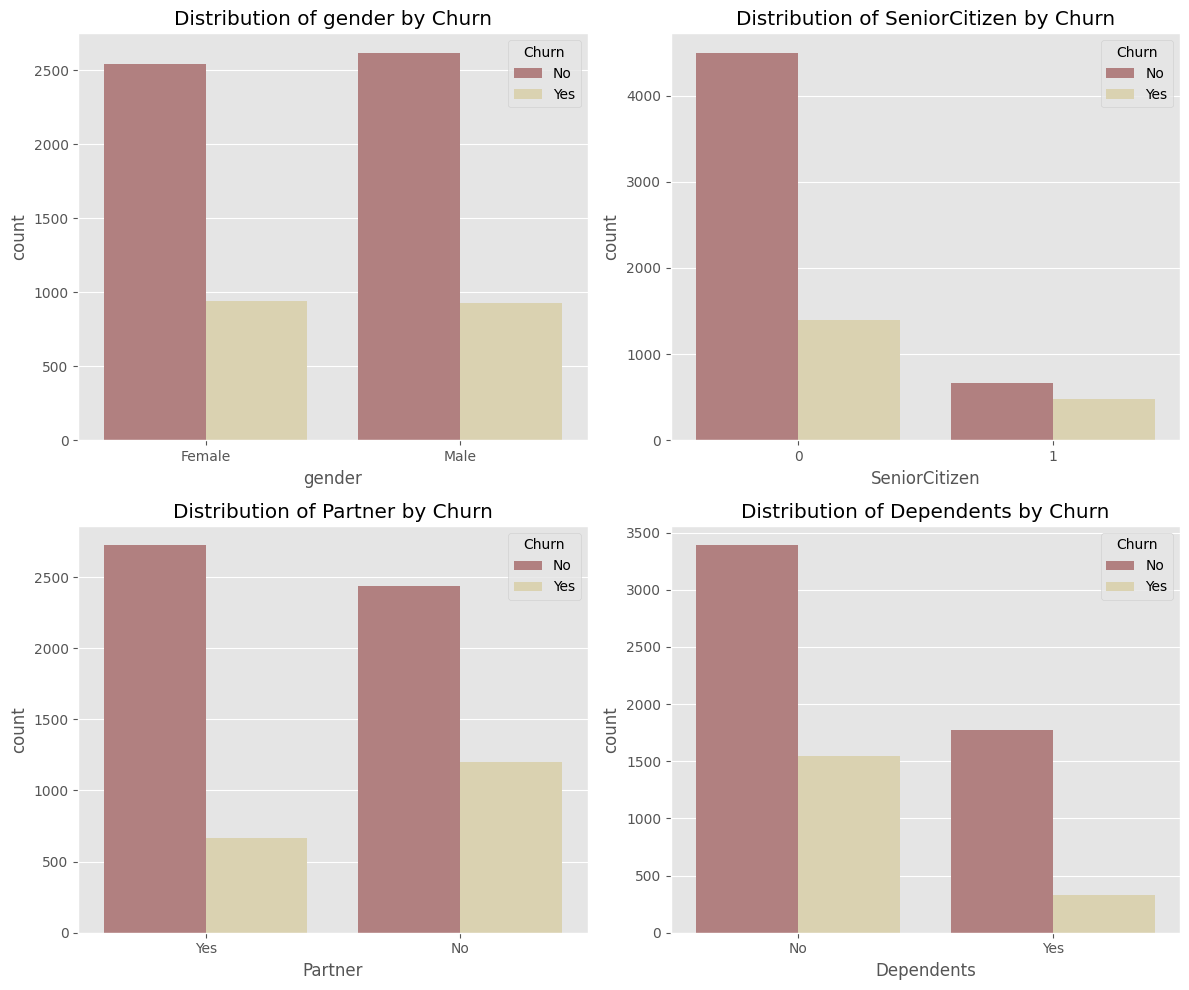

In [20]:
def histogram_categorical(df, categorical_values, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(categorical_values)/2)

    fig = plt.figure(figsize=(12,5*number_of_rows))

    for index, column in enumerate(categorical_values,1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        sns.countplot(data=df, x=column, hue=target, palette="pink", ax=ax)
        ax.set_title(f"Distribution of {column} by {target}")
        ax.legend(title=target, loc='upper right')

    plt.tight_layout()
    plt.savefig("categorical_variables.png", dpi=300)
    return plt.show()

customer_demographic = ["gender","SeniorCitizen","Partner","Dependents"]

histogram_categorical(df, customer_demographic, "Churn")

The analysis of customer demographics in relation to churn provides several insights. First, gender does not appear to be a significant factor influencing churn, as both male and female customers exhibit nearly equal proportions of churn. In contrast, senior citizens demonstrate a higher likelihood of churn compared to non-senior customers, indicating that age is an important determinant of customer retention. Furthermore, customers with a partner are less likely to churn compared to those without a partner, suggesting that household stability may contribute to stronger loyalty. Similarly, customers with dependents show a lower tendency to churn, while those without dependents are more prone to leaving the service. Overall, the most influential demographic factors associated with churn are senior citizenship, the absence of a partner, and the absence of dependents, while gender shows minimal impact.

## **Checking Outlier**

/tmp/ipython-input-1572334183.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], ax=axes[i], palette="pink")
/tmp/ipython-input-1572334183.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], ax=axes[i], palette="pink")
/tmp/ipython-input-1572334183.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=data[col], ax=axes[i], palette="pink")


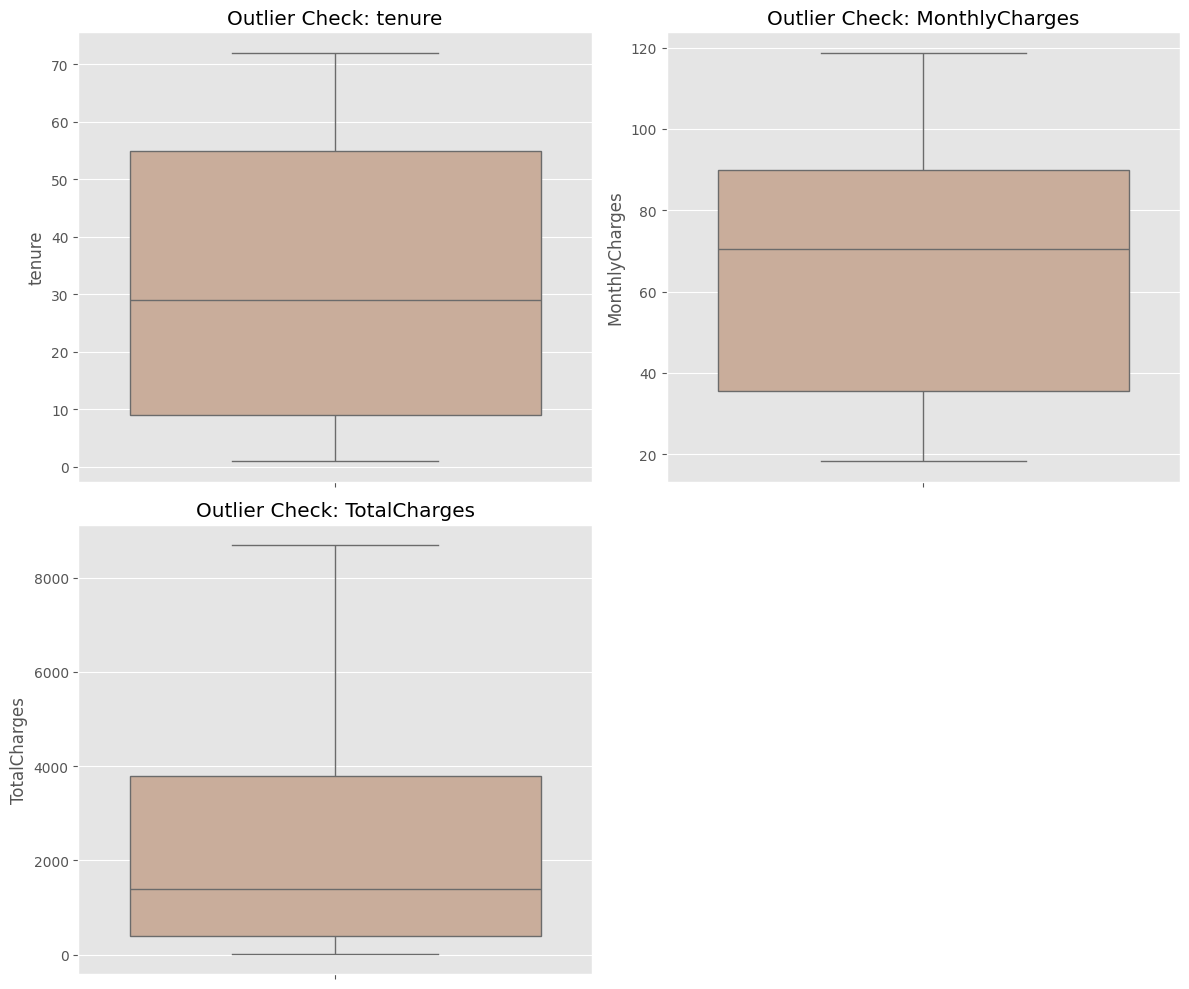

In [21]:
def plot_outlier_boxplots(data, num_cols):
    cols = 2
    rows = math.ceil(len(num_cols) / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))
    axes = axes.flatten()

    for i, col in enumerate(num_cols):
        sns.boxplot(y=data[col], ax=axes[i], palette="pink")
        axes[i].set_title(f"Outlier Check: {col}")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.savefig("outliers_boxplots.png", dpi=300)
    plt.show()

numerical_vars = ["tenure", "MonthlyCharges", "TotalCharges"]
plot_outlier_boxplots(df, numerical_vars)

There are no outlier based on the boxplots above.

## **Label Encoding & One-Hot Encoding**

To prepare categorical variables for machine learning models, they need to be transformed into numerical values. For binary features such as Partner, Dependents, PhoneService, Churn, and PaperlessBilling, label encoding is applied by mapping “Yes” to 1 and “No” to 0, while for gender, “Female” is mapped to 1 and “Male” to 0. On the other hand, categorical variables with more than two categories, such as MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, and PaymentMethod, are encoded using one-hot encoding. This technique creates additional binary columns for each category, making the data more suitable for algorithms that cannot directly process categorical values.

In [22]:
feature_le = ["Partner","Dependents","PhoneService", "Churn","PaperlessBilling"]
def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({"Yes":1, "No":0})
    return df

df = label_encoding(df,feature_le)
df["gender"] = df["gender"].map({"Female":1, "Male":0})

In [23]:
features_ohe = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
df_ohe = pd.get_dummies(df, columns=features_ohe)

Feature scaling is needed because numerical variables in a dataset often have very different ranges, which can bias the learning process of machine learning models. For instance, if one feature has values in the hundreds while another only ranges between 0 and 1, models that rely on distance or gradient-based optimization may give more weight to the larger-valued feature, even if it is not more important. By applying MinMaxScaler to rescale variables like MonthlyCharges, TotalCharges, and tenure into a uniform range between 0 and 1, each feature contributes proportionally and fairly, making the training process more stable and improving the performance as well as interpretability of the model.


In [24]:
features_mms = ["tenure","MonthlyCharges","TotalCharges"]

df_mms = pd.DataFrame(df_ohe, columns=features_mms)
df_remaining = df_ohe.drop(columns=features_mms)

mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(df_mms)

rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=df_remaining.index)
df = pd.concat([rescaled_feature_df,df_remaining],axis=1)

## **Correlation Analysis**

In [28]:
df_ohe = df_ohe.drop(columns=["customerID"])

features_mms = ["tenure","MonthlyCharges","TotalCharges"]

df_mms = df_ohe[features_mms]
df_remaining = df_ohe.drop(columns=features_mms)

mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(df_mms)

rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=df_remaining.index)

df = pd.concat([rescaled_feature_df, df_remaining], axis=1)

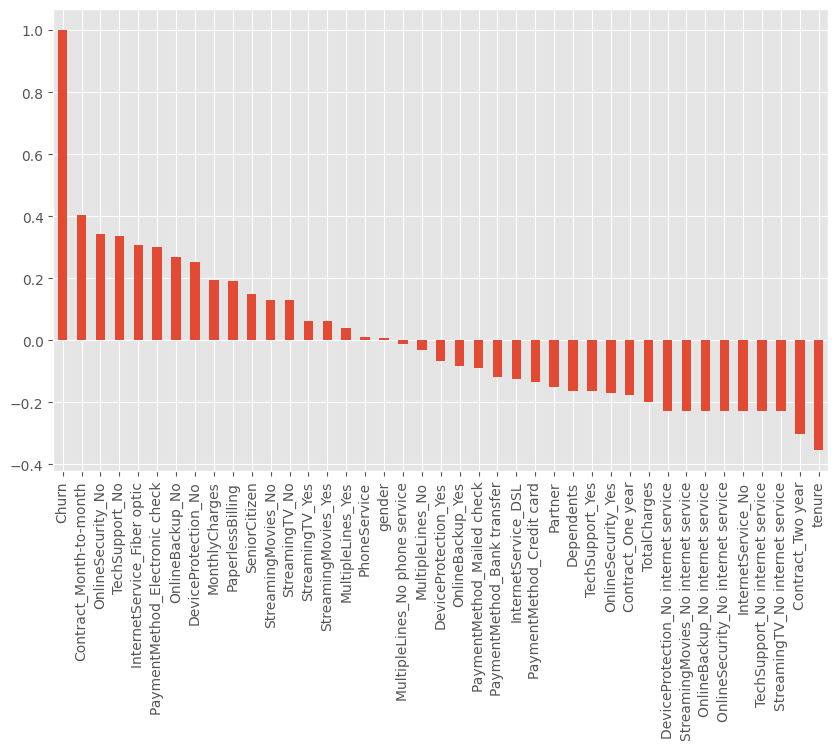

In [29]:
plt.figure(figsize=(10,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.savefig("correlation.png", dpi=300)
plt.show()

Correlation is a statistical measure used to evaluate the strength and direction of the linear relationship between variables. In this analysis, we examine the correlation between the features in the dataset and the target variable, Churn.

The results indicate that the variable Contract_Month-to-month has the highest positive correlation with churn, suggesting that customers on month-to-month contracts are more likely to cancel their subscription. In contrast, tenure exhibits a negative correlation with churn, meaning that customers who have been with the service longer are less likely to churn.

## **Data Split**

In [30]:
# 85% Train data and 15% testing data

X = df.drop(columns="Churn")
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5977, 40), (1055, 40), (5977,), (1055,))

## **Models**

1. K-Nearest Neighbors
2. Logistic Regression
3. DecisionTreeClassifier

## **Metric Evaluations**

To evaluate the model, several metrics are used:

- Feature weights: identify which features have the strongest impact on predictions. In logistic regression, these weights show how much each feature affects the probability of the target outcome.  
- Confusion matrix: shows counts of true positives, true negatives, false positives, and false negatives, comparing predicted and actual values.  
- Accuracy score: measures the proportion of correct predictions in both training and testing sets.  
- ROC curve: plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at different thresholds, showing the model’s diagnostic ability.  
- AUC (ROC): area under the ROC curve; higher values indicate better discrimination between positive and negative classes.  
- Precision-Recall Curve (PRC): shows the trade-off between precision and recall across thresholds, useful for imbalanced datasets.  
- F1 score: the harmonic mean of precision and recall, useful for evaluating performance on imbalanced data.  
- AUC (PRC): total area under the precision-recall curve, summarizing the model’s ability to maintain high precision and recall.  

These metrics together provide a clear picture of model performance and its effectiveness on imbalanced data.

In [32]:
def feature_weights(X, model, model_name):
    if hasattr(model, "coef_"):
        importances = pd.Series(model.coef_[0], index=X.columns)
        importances_sorted = importances.sort_values(ascending=False)

        top_features = importances_sorted.head(10)
        plt.figure(figsize=(8,6))
        plt.title(f"{model_name} - Top 10 Features")
        top_features.plot(kind="bar")
        plt.tight_layout()
        plt.show()

        bottom_features = importances_sorted.tail(10)
        plt.figure(figsize=(8,6))
        plt.title(f"{model_name} - Bottom 10 Features")
        bottom_features.plot(kind="bar")
        plt.tight_layout()
        plt.show()

In [33]:
def plot_confusion_matrix(X_train, y_train, X_test, y_test, y_pred, model, model_name):
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
    cm_display.plot(cmap=plt.cm.Blues)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

    test_acc = accuracy_score(y_test, y_pred)
    train_acc = model.score(X_train, y_train)

    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")

In [36]:
def plot_roc_curve(y_true, y_pred_probs, model_name):
    probs = y_pred_probs[:, 1]
    fpr, tpr, _ = roc_curve(y_true, probs)
    auc_score = roc_auc_score(y_true, probs)

    plt.figure(figsize=(7,6))
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.4f})")
    plt.title(f"{model_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"{model_name} - ROC AUC Score: {auc_score:.4f}")

In [37]:
def plot_precision_recall(y_true, y_pred_labels, y_pred_probs, model_name):
    probs = y_pred_probs[:, 1]
    precision, recall, _ = precision_recall_curve(y_true, probs)

    plt.figure(figsize=(7,6))
    plt.plot(recall, precision, label=f"{model_name}")
    plt.title(f"{model_name} - Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    f1 = f1_score(y_true, y_pred_labels)
    pr_auc = auc(recall, precision)
    print(f"{model_name} - F1 Score: {f1:.4f}")
    print(f"{model_name} - PR AUC Score: {pr_auc:.4f}")

## **KNN**

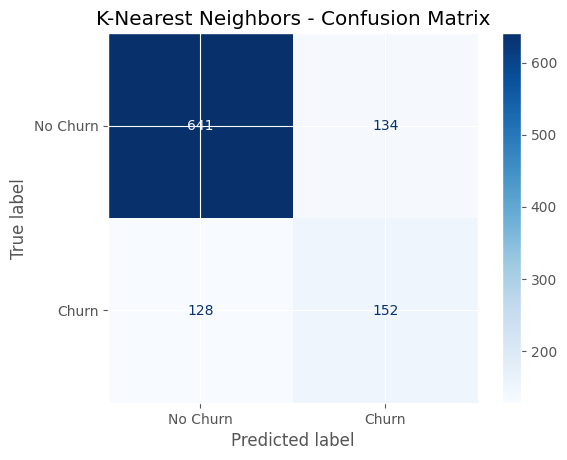

Train Accuracy: 0.8370
Test Accuracy: 0.7517


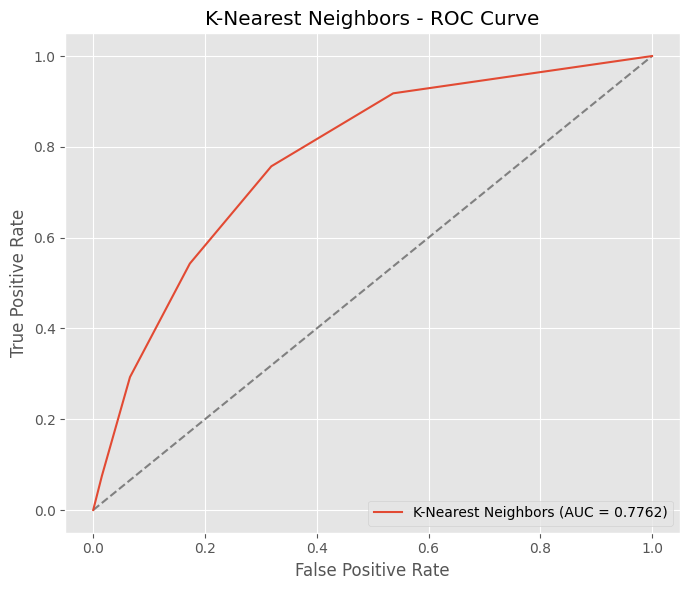

K-Nearest Neighbors - ROC AUC Score: 0.7762


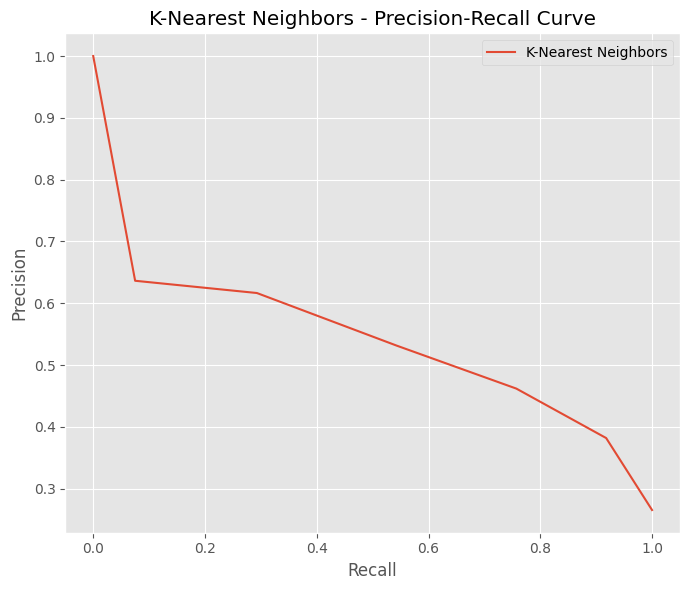

K-Nearest Neighbors - F1 Score: 0.5371
K-Nearest Neighbors - PR AUC Score: 0.5422


In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_pred_knn_proba = knn.predict_proba(X_test)

plot_confusion_matrix(X_train, y_train, X_test, y_test, y_pred_knn, knn, "K-Nearest Neighbors")
plot_roc_curve(y_test, y_pred_knn_proba, "K-Nearest Neighbors")
plot_precision_recall(y_test, y_pred_knn, y_pred_knn_proba, "K-Nearest Neighbors")

## **Logistic Regression**

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg_proba = logreg.predict_proba(X_test)

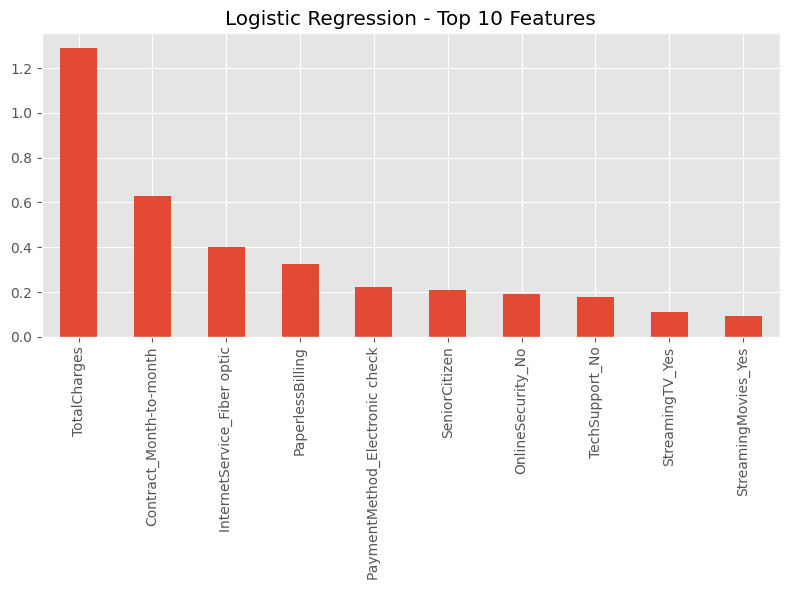

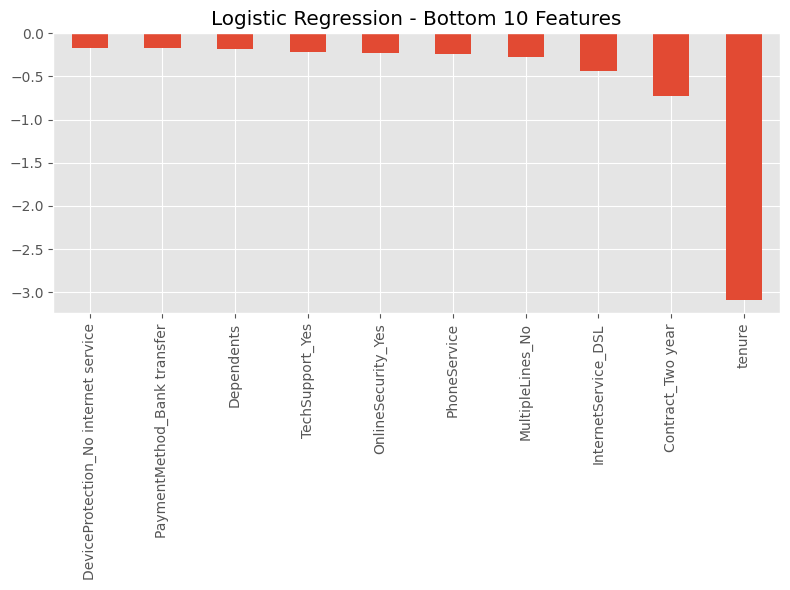

In [42]:
feature_weights(X_train, logreg, "Logistic Regression")

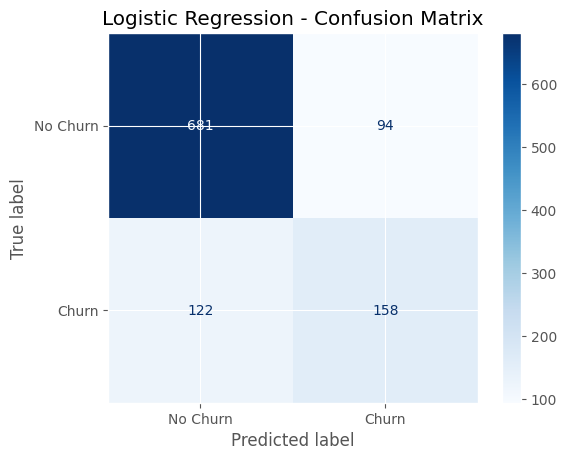

Train Accuracy: 0.8049
Test Accuracy: 0.7953


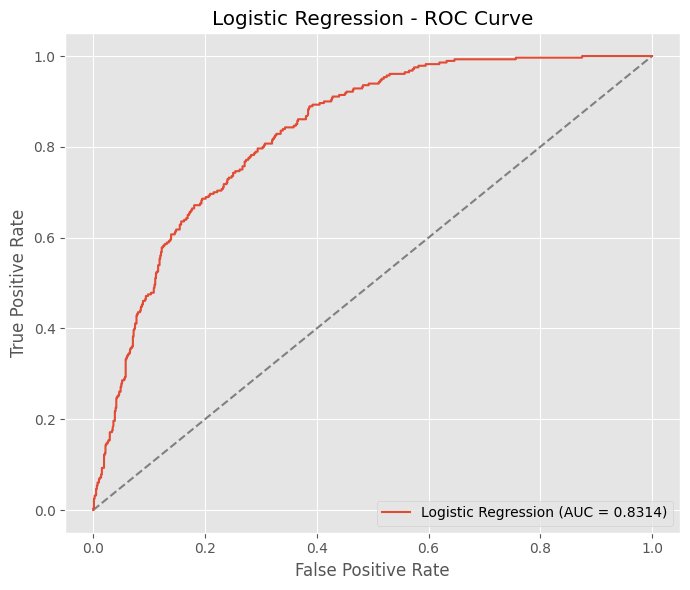

Logistic Regression - ROC AUC Score: 0.8314


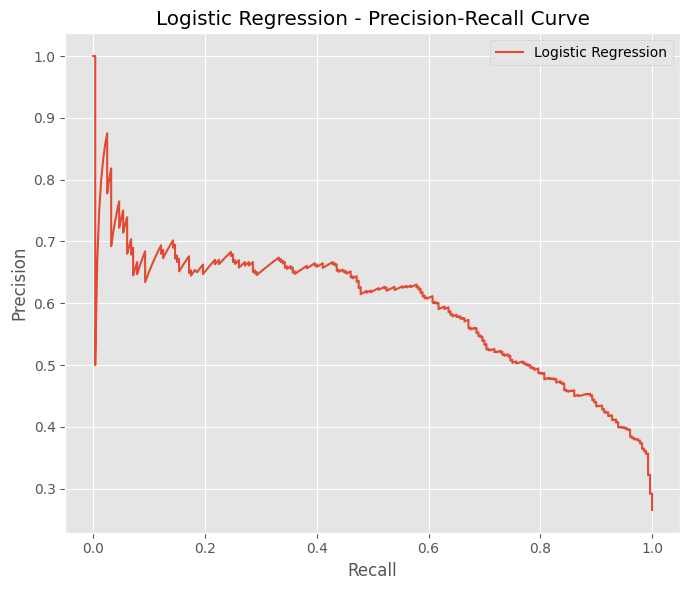

Logistic Regression - F1 Score: 0.5940
Logistic Regression - PR AUC Score: 0.5934


In [43]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, y_pred_logreg, logreg, "Logistic Regression")
plot_roc_curve(y_test, y_pred_logreg_proba, "Logistic Regression")
plot_precision_recall(y_test, y_pred_logreg, y_pred_logreg_proba, "Logistic Regression")

## **DecisionTreeClassifier**

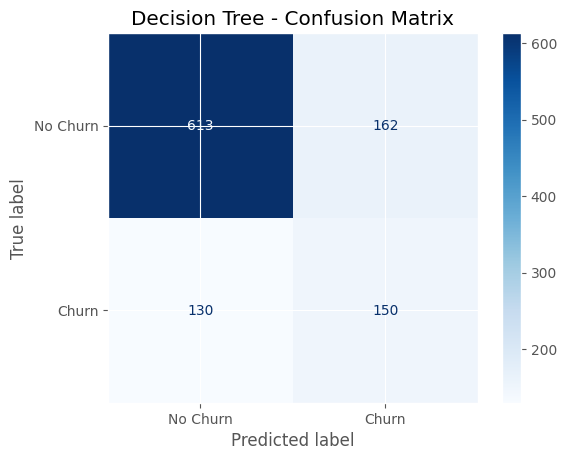

Train Accuracy: 0.9983
Test Accuracy: 0.7232


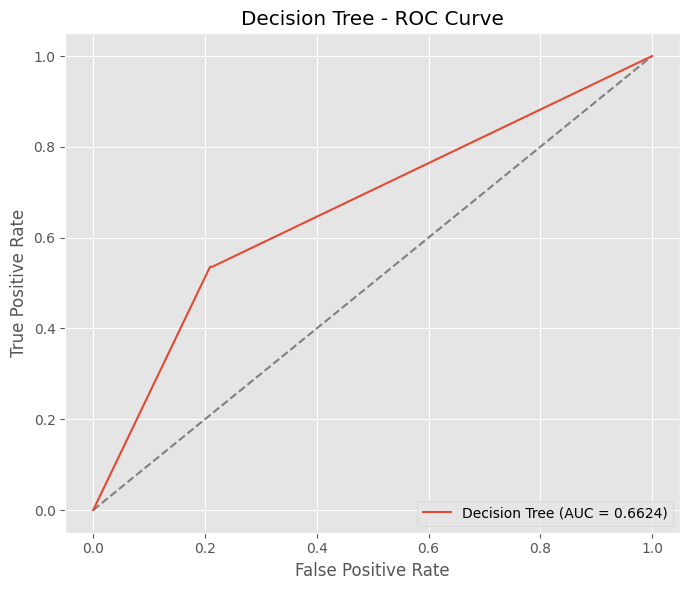

Decision Tree - ROC AUC Score: 0.6624


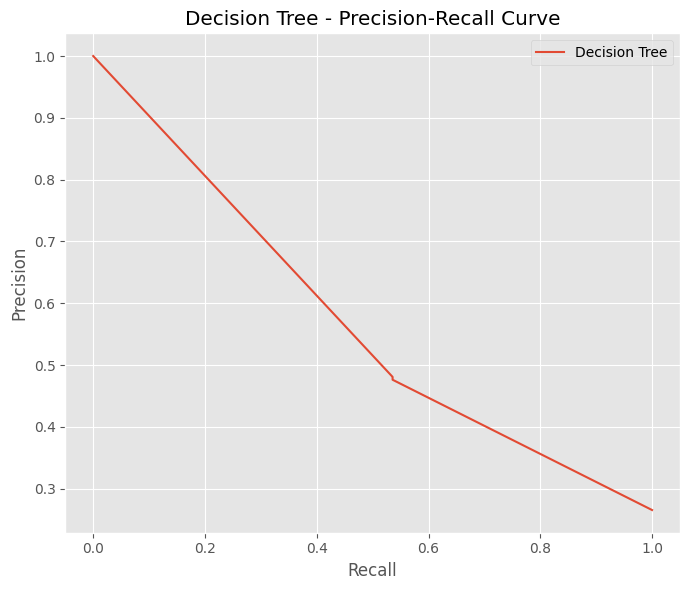

Decision Tree - F1 Score: 0.5068
Decision Tree - PR AUC Score: 0.5688


In [44]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

y_pred_dtree = dtree.predict(X_test)
y_pred_dtree_proba = dtree.predict_proba(X_test)

plot_confusion_matrix(X_train, y_train, X_test, y_test, y_pred_dtree, dtree, "Decision Tree")
plot_roc_curve(y_test, y_pred_dtree_proba, "Decision Tree")
plot_precision_recall(y_test, y_pred_dtree, y_pred_dtree_proba, "Decision Tree")

## **Conclusion**

In this project, the Telco Customer Churn dataset was utilized to demonstrate a comprehensive, end-to-end machine learning workflow. The initial stages focused on data cleaning and exploratory visualization to understand the underlying patterns and distributions. Subsequently, categorical variables were transformed into numerical representations, and numerical features were scaled to ensure consistency and optimal performance for the models.

Three machine learning algorithms were implemented and compared: K-Nearest Neighbors, Decision Tree, and Logistic Regression. Evaluation metrics, including confusion matrix, ROC curve, precision-recall curve, and feature importance, were employed to assess model performance. Among the models tested, Logistic Regression achieved superior predictive accuracy, demonstrating its effectiveness in identifying customers at risk of churn.

Accurately predicting potential churn is critical for targeted retention strategies. High-performing models enable organizations to anticipate customer behavior, allowing the implementation of cost-effective interventions that maximize customer lifetime value while minimizing unnecessary retention expenditures.

### Business Insights and Strategic Recommendations

Based on this project, several valuable business insights can be deduced to enhance customer retention strategies:

1. **Customer Tenure is Crucial**  
   Customers with shorter tenure are significantly more likely to churn. Long-term customers tend to be more loyal, suggesting that efforts to improve initial customer experience and onboarding can reduce early churn. Maintaining engagement during the early months and offering targeted incentives may bolster long-term retention.

2. **Pricing and Service Offerings Impact Churn**  
   Customers with higher monthly charges show a higher tendency to leave, particularly in the mid-to-high pricing range. This indicates that price sensitivity plays a role in customer decisions, and competitive or value-based pricing strategies might reduce churn. Additionally, customers without internet security, backup, or tech support are more prone to churn, highlighting the importance of bundled or enhanced support services.

3. **Contract Terms and Billing Preferences Matter**  
   Month-to-month contracts and paperless billing are associated with increased churn rates. Long-term contracts (1 or 2 years) and mailed billing could promote customer loyalty. Offering incentives for longer commitments and personalized billing options could improve retention rates.

4. **Internet Service and Additional Services Influence Loyalty**  
   Fiber optic users and those subscribed to entertainment services like streaming TV or movies tend to have higher churn rates. This suggests that while such add-ons are attractive, they may also be linked to price sensitivity or switching behavior. Educating customers on the value and providing bundled discounts may mitigate this tendency.

5. **Predictive Modeling Supports Targeted Interventions**  
   High-performing models like logistic regression can accurately identify at-risk customers, facilitating targeted retention efforts. Deploying predictive analytics enables proactive engagement, such as personalized offers or service upgrades, leading to better customer lifetime value and cost-effective retention strategies.

6. **Holistic Customer Understanding is Essential**  
   Combining demographic, behavioral, and service-related data provides a comprehensive view of customer risk. This integrated approach allows for tailored marketing and customer service strategies, effectively reducing churn.

## Strategic Recommendations

- Focus retention efforts on customers with short tenure through engagement programs.
- Encourage long-term contracts and offer incentives for commitment.
- Offer personalized billing options and transparent pricing to address price sensitivity.
- Enhance support services and bundle value-added offerings to improve satisfaction.
- Utilize predictive models to identify at-risk customers early and deploy targeted retention campaigns.

Implementing these insights can significantly decrease churn rates, increase customer loyalty, and improve overall profitability.